In [2]:
#!git clone --depth=1 https://github.com/geadalfa/twint.git

In [3]:
#cd twint

In [2]:
# !pip install . -r requirements.txt
# What version of Python do you have?
import sys

import tensorflow
import pandas as pd
import sklearn as sk
import tensorflow as tf

check_gpu = len(tf.config.list_physical_devices('GPU'))>0

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print("GPU is", "available" if check_gpu \
      else "NOT AVAILABLE")

Tensor Flow Version: 2.4.1
Keras Version: 2.4.0

Python 3.7.10 (default, Feb 26 2021, 13:06:18) [MSC v.1916 64 bit (AMD64)]
Pandas 1.2.4
Scikit-Learn 0.24.1
GPU is available


In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPUs


In [4]:
#Crawling
import twint  # import library twint
import nest_asyncio # pip install nest_asyncio 
import json
import time
nest_asyncio.apply() # prevent event loop to be nested
import requests

# Preprocessing
import os
import pandas as pd
pd.set_option('max_colwidth', 5000)
import numpy as np
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords

# Visualization
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # Untuk menampilkan kata-kata yang sering muncul melalui gambar
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling
import tensorflow as tf # library machine learning dari google untuk memproses dataset
from tensorflow.keras.optimizers import RMSprop # mengimport optimizer untuk model
from tensorflow.keras.preprocessing.text import Tokenizer # Mengimport tokenizer untuk preprocessing kata-kata
from tensorflow.keras.preprocessing.sequence import pad_sequences # Mengimport pad_sequences untuk preprocessing kata-kata
from tensorflow.keras.callbacks import ModelCheckpoint # Callback untuk menyimpan model
from tensorflow.keras import regularizers # Library untuk mencegah overfitting pada model
#import imblearn
from imblearn.under_sampling import (RandomUnderSampler, 
                                    NearMiss, 
                                    InstanceHardnessThreshold,
                                    CondensedNearestNeighbour,
                                    EditedNearestNeighbours,
                                    RepeatedEditedNearestNeighbours,
                                    AllKNN,
                                    NeighbourhoodCleaningRule,
                                    OneSidedSelection,
                                    TomekLinks)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alfa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alfa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Alfa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
twi = twint.Config()
#twi.Search = 'Depok OR kesehatan OR rs OR rumah sakit'
#twi.Search = 'Depok OR Kesehatan OR rs'#, 'rumah sakit'#, 'rumah sakit'
#twi.Search = 'Depok', 'puskesmas OR pskms'#, 'rumah sakit'
twi.Search = 'Depok', 'covid OR korona OR corona'
twi.Lang = 'in'
twi.Until = '2021-03-30'
twi.Since = '2020-2-28'
#twi.Geo = "-6.406954, 106.794451,100km"51,100km"
twi.Limit = 100000
Pandas = True
twi.Custom["tweet"] = ["id", "date", "username", "tweet"]
#twi.Output = "kesehatan_fix.csv"
twi.Store_csv = True
#twint.run.Search(twi)

1376679586717560832 2021-03-30 06:36:05 +0700 <agfiansyah> @fathiafifmhsn Negara wkwkwLAND emang suka bikin acara ga jelas buang² anggaran  3 orang kena korona di depok city  pas sembuh dirayain dipikir korona langsung hilang kali🤣🤣
1376666996616568833 2021-03-30 05:46:03 +0700 <kompascom> Pemerintah Kota Depok mencatat ada 56 kasus baru Covid-19, 218 pasien pulih, dan sembilan warga meninggal akibat Covid-19 dalam sehari.  https://t.co/XKWJyTVu80
1376534175956656129 2021-03-29 20:58:16 +0700 <mediaserunicoid> Wakil Wali Kota Depok, Imam Budi Hartono berharap Jawa Barat Culture and Tourism Festival (JaFest) 2021 dapat membantu memulihkan ekonomi di masa pandemi Covid-19. Terutama, pada sektor industri pariwisata.   https://t.co/UlC8uMgZNS  https://t.co/eHHNLaCYos
1376477264091652099 2021-03-29 17:12:08 +0700 <inifaijule> @hanakubil2 corona ilang gua samperin lu ke depok bil
1376471898897281028 2021-03-29 16:50:48 +0700 <jabarnewss> Selama Covid-19 Stok Darah Di PMI Kota Depok Tak Perna

In [5]:
df = pd.read_csv('kesehatan_fix.csv')

In [6]:
df.tail()

id        date       username  \
27578  1234072671723220992  2020-03-01         triarx   
27579  1233424882475470848  2020-02-28    wonwon_zzzz   
27580  1233297516193554432  2020-02-28     hab1bull4h   
27581  1233254169303142401  2020-02-28    menumpahkan   
27582  1233225553324343297  2020-02-28  wartakotalive   

                                                                                                                                                                                                                                                                                          tweet  
27578                                           Aku : *pas keluar rmh lupa bawa masker* yawdalah yaa dekat gini, belum ada yg positif juga wong depok pinggiran..  Pas di rmh ga enak badan : *panik* *googling segala macam ciri2 korona* *minum vit c* pokoknya tdk boleh sakit* TIDAAAKKKKKK  
27579                                                                                                                                                                                                          Kalo london bebas corona mah stay aja dulu di sana... Apa mau ke depok sini wkwk  
27580                                                (🦠) Kalau gini Virus Coronanya bisa kena Virus #corona #coronavirüsü #coronavirüs #coronao #corona🍺 #covid19 #covid #love #cinta #banjir #sayang #rindu #setia #jakarta #bogor #depok #tanggeranh bekasi #puncak…  https://t.co/gkjNJLxiPg  
27581  Pemerintah mana bisa nanganin wabah corona. Plis sakit yang kita biasa hadapi aja kita kekurangan staff kesehatan dan sarana prasarana. Karena emang kebanyakan warga.  Wabah uler d depok aja gak ada program jelasnya. Warga + komunitas hewan cuma bisa yah pasrah klo ketemu tangkep  
27582                                         UPDATE Ada 10 Orang Terindikasi Pelaku Prostitusi Diamankan Satpol PP Kota Depok di Sebuah Apartemen  https://t.co/qtz6HLgtic lewat @wartakotalive #TentaraAllah #MyPresidentlsAnIdiot #COVID-19 #BoycottIndia @FeryantoHadi @ladang17 @budimalau

# Preprocessingg

In [7]:
# Merubah menjadi huruf kecil
df['cleaned_tweets'] = df['tweet'].apply(lambda x: x.lower())
df.tail()

id        date       username  \
27578  1234072671723220992  2020-03-01         triarx   
27579  1233424882475470848  2020-02-28    wonwon_zzzz   
27580  1233297516193554432  2020-02-28     hab1bull4h   
27581  1233254169303142401  2020-02-28    menumpahkan   
27582  1233225553324343297  2020-02-28  wartakotalive   

                                                                                                                                                                                                                                                                                          tweet  \
27578                                           Aku : *pas keluar rmh lupa bawa masker* yawdalah yaa dekat gini, belum ada yg positif juga wong depok pinggiran..  Pas di rmh ga enak badan : *panik* *googling segala macam ciri2 korona* *minum vit c* pokoknya tdk boleh sakit* TIDAAAKKKKKK   
27579                                                                                                                                                                                                          Kalo london bebas corona mah stay aja dulu di sana... Apa mau ke depok sini wkwk   
27580                                                (🦠) Kalau gini Virus Coronanya bisa kena Virus #corona #coronavirüsü #coronavirüs #coronao #corona🍺 #covid19 #covid #love #cinta #banjir #sayang #rindu #setia #jakarta #bogor #depok #tanggeranh bekasi #puncak…  https://t.co/gkjNJLxiPg   
27581  Pemerintah mana bisa nanganin wabah corona. Plis sakit yang kita biasa hadapi aja kita kekurangan staff kesehatan dan sarana prasarana. Karena emang kebanyakan warga.  Wabah uler d depok aja gak ada program jelasnya. Warga + komunitas hewan cuma bisa yah pasrah klo ketemu tangkep   
27582                                         UPDATE Ada 10 Orang Terindikasi Pelaku Prostitusi Diamankan Satpol PP Kota Depok di Sebuah Apartemen  https://t.co/qtz6HLgtic lewat @wartakotalive #TentaraAllah #MyPresidentlsAnIdiot #COVID-19 #BoycottIndia @FeryantoHadi @ladang17 @budimalau   

                                                                                                                                                                                                                                                                                 cleaned_tweets  
27578                                           aku : *pas keluar rmh lupa bawa masker* yawdalah yaa dekat gini, belum ada yg positif juga wong depok pinggiran..  pas di rmh ga enak badan : *panik* *googling segala macam ciri2 korona* *minum vit c* pokoknya tdk boleh sakit* tidaaakkkkkk  
27579                                                                                                                                                                                                          kalo london bebas corona mah stay aja dulu di sana... apa mau ke depok sini wkwk  
27580                                                (🦠) kalau gini virus coronanya bisa kena virus #corona #coronavirüsü #coronavirüs #coronao #corona🍺 #covid19 #covid #love #cinta #banjir #sayang #rindu #setia #jakarta #bogor #depok #tanggeranh bekasi #puncak…  https://t.co/gkjnjlxipg  
27581  pemerintah mana bisa nanganin wabah corona. plis sakit yang kita biasa hadapi aja kita kekurangan staff kesehatan dan sarana prasarana. karena emang kebanyakan warga.  wabah uler d depok aja gak ada program jelasnya. warga + komunitas hewan cuma bisa yah pasrah klo ketemu tangkep  
27582                                         update ada 10 orang terindikasi pelaku prostitusi diamankan satpol pp kota depok di sebuah apartemen  https://t.co/qtz6hlgtic lewat @wartakotalive #tentaraallah #mypresidentlsanidiot #covid-19 #boycottindia @feryantohadi @ladang17 @budimalau

In [8]:
# Implementasi Regular Expression untuk menghapus simbol dan emoji
def normalisasi(text):
    text = text.encode('ascii', 'replace').decode('ascii') # remove non ASCII (emoticon, chinese word, .etc)
    text = re.sub(r"http\S+", " ", text)
    text = re.sub(r"@\w+", " ", text)
    text = re.sub(r"#\w+", " ", text)
    text = re.sub(r'\W', " ", text)
    text = re.sub(r"\d+", "", text)    
    text = re.sub(r'_', ' ',text)
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"^\s+", '', text)
    #text = text.lstrip()
    return text

df['cleaned_tweets'] = df['cleaned_tweets'].apply(lambda x: normalisasi(x))
df.tail(2)

id        date       username  \
27581  1233254169303142401  2020-02-28    menumpahkan   
27582  1233225553324343297  2020-02-28  wartakotalive   

                                                                                                                                                                                                                                                                                          tweet  \
27581  Pemerintah mana bisa nanganin wabah corona. Plis sakit yang kita biasa hadapi aja kita kekurangan staff kesehatan dan sarana prasarana. Karena emang kebanyakan warga.  Wabah uler d depok aja gak ada program jelasnya. Warga + komunitas hewan cuma bisa yah pasrah klo ketemu tangkep   
27582                                         UPDATE Ada 10 Orang Terindikasi Pelaku Prostitusi Diamankan Satpol PP Kota Depok di Sebuah Apartemen  https://t.co/qtz6HLgtic lewat @wartakotalive #TentaraAllah #MyPresidentlsAnIdiot #COVID-19 #BoycottIndia @FeryantoHadi @ladang17 @budimalau   

                                                                                                                                                                                                                                                                          cleaned_tweets  
27581  pemerintah mana bisa nanganin wabah corona plis sakit yang kita biasa hadapi aja kita kekurangan staff kesehatan dan sarana prasarana karena emang kebanyakan warga wabah uler d depok aja gak ada program jelasnya warga komunitas hewan cuma bisa yah pasrah klo ketemu tangkep  
27582                                                                                                                                                                           update ada orang terindikasi pelaku prostitusi diamankan satpol pp kota depok di sebuah apartemen lewat

In [9]:
# Merubah kata alay menjadi kata baku
dict = {row[0] : row[1] for _, row in pd.read_csv("kbba.txt", delimiter = "\t").iterrows()}

def kbbi(text): 
    token = text.split()
    final_string = ' '.join(str(dict.get(word, word)) for word in token)
    return final_string

df['cleaned_tweets'] = df['cleaned_tweets'].apply(lambda x: kbbi(x))
df.tail(2)

id        date       username  \
27581  1233254169303142401  2020-02-28    menumpahkan   
27582  1233225553324343297  2020-02-28  wartakotalive   

                                                                                                                                                                                                                                                                                          tweet  \
27581  Pemerintah mana bisa nanganin wabah corona. Plis sakit yang kita biasa hadapi aja kita kekurangan staff kesehatan dan sarana prasarana. Karena emang kebanyakan warga.  Wabah uler d depok aja gak ada program jelasnya. Warga + komunitas hewan cuma bisa yah pasrah klo ketemu tangkep   
27582                                         UPDATE Ada 10 Orang Terindikasi Pelaku Prostitusi Diamankan Satpol PP Kota Depok di Sebuah Apartemen  https://t.co/qtz6HLgtic lewat @wartakotalive #TentaraAllah #MyPresidentlsAnIdiot #COVID-19 #BoycottIndia @FeryantoHadi @ladang17 @budimalau   

                                                                                                                                                                                                                                                                                  cleaned_tweets  
27581  pemerintah mana bisa nanganin wabah corona plis sakit yang kita biasa hadapi saja kita kekurangan staff kesehatan dan sarana prasarana karena memang kebanyakan warga wabah uler di depok saja tidak ada program jelasnya warga komunitas hewan cuma bisa yah pasrah kalau ketemu tangkep  
27582                                                                                                                                                                          update ada orang terindikasi pelaku prostitusi diamankan satpol pulang pergi kota depok di sebuah apartemen lewat

In [10]:
# Menghapus stopwords
# def remove_stop_words(text):
#     text = text.split()
#     listStopword =  set(stopwords.words('indonesian'))
#     text = [w for w in text if not w in listStopword]
#     text = " ".join(text)
#     return text

# df['cleaned_tweets'] = df['cleaned_tweets'].apply(lambda x: remove_stop_words(x))
df.tail(2)

id        date       username  \
27581  1233254169303142401  2020-02-28    menumpahkan   
27582  1233225553324343297  2020-02-28  wartakotalive   

                                                                                                                                                                                                                                                                                          tweet  \
27581  Pemerintah mana bisa nanganin wabah corona. Plis sakit yang kita biasa hadapi aja kita kekurangan staff kesehatan dan sarana prasarana. Karena emang kebanyakan warga.  Wabah uler d depok aja gak ada program jelasnya. Warga + komunitas hewan cuma bisa yah pasrah klo ketemu tangkep   
27582                                         UPDATE Ada 10 Orang Terindikasi Pelaku Prostitusi Diamankan Satpol PP Kota Depok di Sebuah Apartemen  https://t.co/qtz6HLgtic lewat @wartakotalive #TentaraAllah #MyPresidentlsAnIdiot #COVID-19 #BoycottIndia @FeryantoHadi @ladang17 @budimalau   

                                                                                                                                                                                                                                                                                  cleaned_tweets  
27581  pemerintah mana bisa nanganin wabah corona plis sakit yang kita biasa hadapi saja kita kekurangan staff kesehatan dan sarana prasarana karena memang kebanyakan warga wabah uler di depok saja tidak ada program jelasnya warga komunitas hewan cuma bisa yah pasrah kalau ketemu tangkep  
27582                                                                                                                                                                          update ada orang terindikasi pelaku prostitusi diamankan satpol pulang pergi kota depok di sebuah apartemen lewat

In [11]:
# Menghapus baris yang mengandung noise
def noise(text): 
    text = text.split()
    listStopword =  ['amp', 'tong', 'fry', 'vcs', 'bahh', 'a', 'wkwkwk', 'c', 'yeey', 'oi', 'pret', 'iya', 'nya', 'sih', 'mbok', 'ku', 'loh', 'lho', 'ah', 'nihh', 'mares', 'openbo', 'ya', 'hah', 'joss', 'deh''rmp', 'v', 'via', 'lha', 'mah', 'xixi']
    text = [w for w in text if not w in listStopword]
    text = " ".join(text)
    return text

df['cleaned_tweets'] = df['cleaned_tweets'].apply(lambda x: noise(x))

In [12]:
df['cleaned_tweets'] = df['cleaned_tweets'].astype(str)

In [13]:
df.drop(['id', 'date', 'username'], axis=1, inplace=True)

In [14]:
df

tweet  \
0                                                                                                                     @fathiafifmhsn Negara wkwkwLAND emang suka bikin acara ga jelas buang² anggaran  3 orang kena korona di depok city  pas sembuh dirayain dipikir korona langsung hilang kali🤣🤣   
1                                                                                                                                  Pemerintah Kota Depok mencatat ada 56 kasus baru Covid-19, 218 pasien pulih, dan sembilan warga meninggal akibat Covid-19 dalam sehari.  https://t.co/XKWJyTVu80   
2                                 Wakil Wali Kota Depok, Imam Budi Hartono berharap Jawa Barat Culture and Tourism Festival (JaFest) 2021 dapat membantu memulihkan ekonomi di masa pandemi Covid-19. Terutama, pada sektor industri pariwisata.   https://t.co/UlC8uMgZNS  https://t.co/eHHNLaCYos   
3                                                                                                                                                                                                                                             @hanakubil2 corona ilang gua samperin lu ke depok bil   
4      Selama Covid-19 Stok Darah Di PMI Kota Depok Tak Pernah Ideal 👇  https://t.co/RRBBk94LpC  #jabarnews #beritalokal #beritahiperlokal #harianjabar #jabartoday #beritajabar #beritajawabarat #jawabarat #jabar #selamcovid19 #stokdarah #pmikotadepok #takpernahideal  https://t.co/fKNGcix0lc   
...                                                                                                                                                                                                                                                                                             ...   
27578                                               Aku : *pas keluar rmh lupa bawa masker* yawdalah yaa dekat gini, belum ada yg positif juga wong depok pinggiran..  Pas di rmh ga enak badan : *panik* *googling segala macam ciri2 korona* *minum vit c* pokoknya tdk boleh sakit* TIDAAAKKKKKK   
27579                                                                                                                                                                                                              Kalo london bebas corona mah stay aja dulu di sana... Apa mau ke depok sini wkwk   
27580                                                    (🦠) Kalau gini Virus Coronanya bisa kena Virus #corona #coronavirüsü #coronavirüs #coronao #corona🍺 #covid19 #covid #love #cinta #banjir #sayang #rindu #setia #jakarta #bogor #depok #tanggeranh bekasi #puncak…  https://t.co/gkjNJLxiPg   
27581      Pemerintah mana bisa nanganin wabah corona. Plis sakit yang kita biasa hadapi aja kita kekurangan staff kesehatan dan sarana prasarana. Karena emang kebanyakan warga.  Wabah uler d depok aja gak ada program jelasnya. Warga + komunitas hewan cuma bisa yah pasrah klo ketemu tangkep   
27582                                             UPDATE Ada 10 Orang Terindikasi Pelaku Prostitusi Diamankan Satpol PP Kota Depok di Sebuah Apartemen  https://t.co/qtz6HLgtic lewat @wartakotalive #TentaraAllah #MyPresidentlsAnIdiot #COVID-19 #BoycottIndia @FeryantoHadi @ladang17 @budimalau   

                                                                                                                                                                                                                                                                                  cleaned_tweets  
0                                                                                                                                    negara wkwkwland memang suka bikin acara tidak jelas buang anggaran orang kena korona di depok city pas sembuh dirayain dipikir korona langsung hilang kali  
1                                                                                                                                                                  

In [15]:
'''import math 

def split(word):
    return [char for char in word]

def wordCluster(custom ,original):
    data = split(original)
    split_input = split(custom)
    index = 0
    result = ''
    for x in split_input:
        if index > len(data)-1:
            index = len(data)-1
        if (x == data[index]):
            result += x
            index += 1
        if index == len(original):
            break
    return result

wordCluster('semenjak jatuh', 'sejak')'''

"import math \n\ndef split(word):\n    return [char for char in word]\n\ndef wordCluster(custom ,original):\n    data = split(original)\n    split_input = split(custom)\n    index = 0\n    result = ''\n    for x in split_input:\n        if index > len(data)-1:\n            index = len(data)-1\n        if (x == data[index]):\n            result += x\n            index += 1\n        if index == len(original):\n            break\n    return result\n\nwordCluster('semenjak jatuh', 'sejak')"

In [16]:
'''import spacy
nlp = spacy.blank('id')
from spacy.lang.id import Indonesian
nlp_id = Indonesian()

df["stemmed_tweets"] = df["cleaned_tweets"].apply(lambda x: " ".join([y.lemma_ for y in nlp_id(x)]))'''
#df["stemmed_tweets"] = df["cleaned_tweets"].apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))


# def Stemming(tweet):
#     token = nltk.word_tokenize(tweet)
#     stem_kalimat = []
#     for k in token:
#         factory = StemmerFactory()
#         stemmer = factory.create_stemmer()
#         stem_kata = stemmer.stem(k.encode('ascii','ignore'))
#         stem_kalimat.append(stem_kata)

#     stem_kalimat_str = ' '.join(stem_kalimat)
#     return stem_kalimat_str

# menghilangkan semua imbuhan kata dalam kalimat
'''def steamming(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    split = text.split()
    hasil = [stemmer.stem(token) for token in split]
    hasil = " ".join(hasil)
    return hasil

df['stemmed_tweets'] = df['cleaned_tweets'].apply(lambda x: steamming(x))'''

#df['cleaned_tweets'] = df['cleaned_tweets'].apply(lambda x: Stemming(x))


'def steamming(text):\n    factory = StemmerFactory()\n    stemmer = factory.create_stemmer()\n    split = text.split()\n    hasil = [stemmer.stem(token) for token in split]\n    hasil = " ".join(hasil)\n    return hasil\n\ndf[\'stemmed_tweets\'] = df[\'cleaned_tweets\'].apply(lambda x: steamming(x))'

In [17]:
df1 = df.copy()
df1.drop(['tweet'], axis=1, inplace=True)
df1.drop_duplicates(keep=False,inplace=True)
df1.reset_index(drop=True, inplace=True)

In [18]:
len(df1)
df1.tail(2)

cleaned_tweets
22177  pemerintah mana bisa nanganin wabah corona plis sakit yang kita biasa hadapi saja kita kekurangan staff kesehatan dan sarana prasarana karena memang kebanyakan warga wabah uler di depok saja tidak ada program jelasnya warga komunitas hewan cuma bisa yah pasrah kalau ketemu tangkep
22178                                                                                                                                                                          update ada orang terindikasi pelaku prostitusi diamankan satpol pulang pergi kota depok di sebuah apartemen lewat

In [19]:
#df.to_excel("output.xlsx") 

# Visualisasi Kata

In [20]:
import matplotlib.pyplot
import seaborn as sns

comment_words=''

for val in df.cleaned_tweets:  
    # merubah val menjadi string
    val = str(val)
  
    # memisahkan variabel val per kata
    tokens = val.split() 
      
    # Mengonversi variabel val menjadi huruf kecil
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "


In [21]:
wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (10,10), facecolor = None) 
plt.imshow(wordcloud1) 
plt.axis("off") 
plt.title("Kata yang Paling Banyak Muncul", fontsize = 37)
plt.tight_layout(pad = 1) 
  
plt.show() 

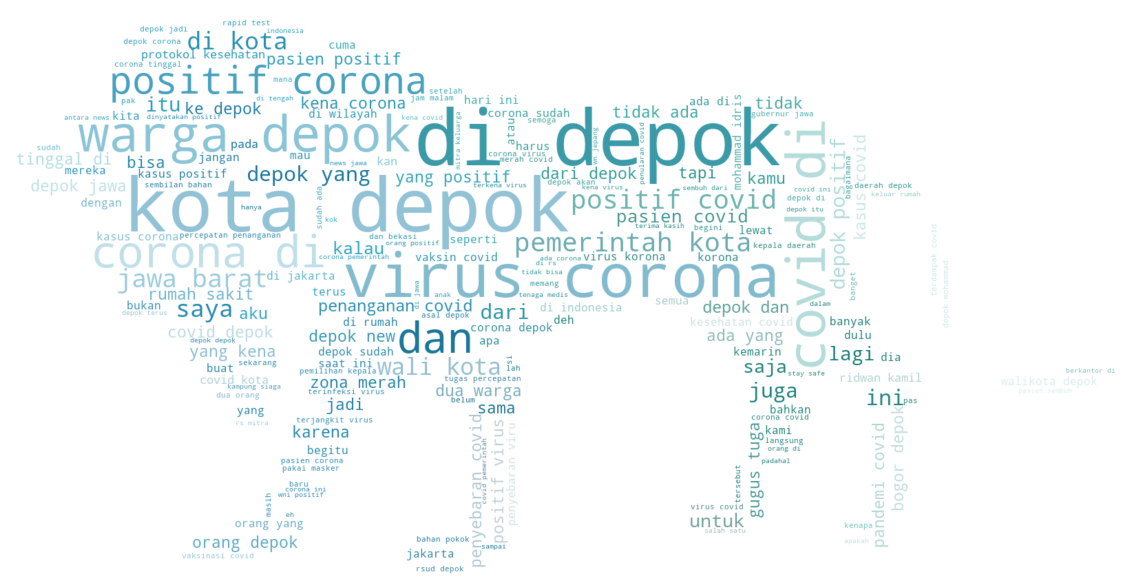

In [22]:
# Mengambil gambar dari website
Mask = np.array(Image.open(requests.get('http://clipart-library.com/images_k/animal-silhouette-painting/animal-silhouette-painting-7.png', stream = True).raw))

# Menggunakan warna dari gambar yang telah diambil
image_colors = ImageColorGenerator(Mask)

# Menggunakan fungsi wordcloud dan memasukkan ke dalam variabel wc 
wc = WordCloud(background_color = 'white', height = 3000, width = 5000, mask = Mask).generate(comment_words)

# Menentukan besarnya gambar
plt.figure(figsize = (20, 30))

# Menampilkan gambar sesuai dengan warna yang telah ada di dalam gambar
plt.imshow(wc.recolor(color_func = image_colors), interpolation = "hamming")

plt.axis('off')
plt.show()

In [23]:
with open('sentimentword.txt', 'r') as data:
    for line in data :
        line.rstrip()
    plaintext = data.read()
    
plaintext = plaintext.replace(' ', ',')

with open('kata_sentimen_negatif.txt', 'r',encoding='utf-8-sig') as data:
    plaintext1 = data.read()
    plaintext1 = plaintext1.rstrip()
    
with open('kata_sentimen_positif.txt', 'r',encoding='utf-8-sig') as data:
    plaintext2 = data.read()
    plaintext2 = plaintext2.rstrip()

with open("kata_sentimen.txt", 'w') as f:
    f.write(plaintext + '\n')
    
with open("kata_sentimen_fix.txt", 'w') as f:
    f.write(plaintext + '\n')
    f.write(plaintext1 + '\n')
    f.write(plaintext2 + '\n')

with open("kata_sentimen_fix.txt", 'r') as f:
    sentifix = f.read()
sentifix = sentifix.replace(',', '\t')

with open("sentifix.txt", 'w') as f:
    f.write(sentifix + '\n')

In [24]:
kamus_sentimen = 'sentifix.txt'

def sentiment_dict(kamus_sentimen):
    ''' (file) -> dictionary
This method should take your sentiment file
and create a dictionary in the form {word: value}
'''    
    kamus = open(kamus_sentimen)
    scores = {} # initialize an empty dictionary
    for line in kamus:
        term, score = line.split("\t") # The file is comma-delimited. 
        scores[term] = int(score) # Convert the score to an integer.

    return scores

In [25]:
import codecs

doc = codecs.open('sentifix.txt','rU','UTF-8') #open for reading with "universal" type set

kamus = pd.read_csv(doc, sep='\t', header=None)
kamus

0  1
0             kali -1
1         terbatas -3
2      penyebabnya -4
3          positif -1
4           korona -2
...            ... ..
10230    melarikan  3
10231      vakansi  3
10232      spesial  4
10233       asrama  3
10234     orisinal  3

[10235 rows x 2 columns]

In [26]:
kamus = kamus.set_index(0).T.to_dict('records')
dct = {}
for item in kamus:
    dct.update(item)

#dct

In [27]:
#type(dct['covid'])

In [28]:
data = df1['cleaned_tweets']
skor = []

for line in data:
    tweet_word = line.split()
    #sent_score is a variable which will take care of word strength / word weightage
    sum_score = 0
    sent_score = 0
    l = len(tweet_word)
    #print(l)
    
    for word in tweet_word:
        word = word.rstrip('?:!.,;"!@')
        word = word.replace("\n", "")

        if word in dct.keys():
            sum_score += int(dct[word])\
    
    skor.append(sum_score)


print(len(skor))
# print(tweet_word)
#print(l)

22179


In [29]:
print(skor[10])

1


In [30]:
# data = df1['cleaned_tweets']
# skor = []
# #for index in range(len(df1)):
#     #tweet_word = tweets[index].split(',')
# for line in data:
#     tweet_word = line.split()
#     #sent_score is a variable which will take care of word strength / word weightage 
#     sent_score = 0
#     for word in tweet_word:
#         word = word.rstrip('?:!.,;"!@')
#         word = word.replace("\n", "")

#         if word in dct.keys():
#             sent_score = sent_score + int(dct[word])
#             #break
#             skor.append(sent_score)
#             #print(sent_score)
#             break

#         else:
#             sent_score = sent_score
#             #break
#             skor.append(sent_score)
#             #print(sent_score)
#             break
#print(len(sent_score))

#     if int(sent_score) > 0:
#         print(tweets[index])
#         if (int(sent_score) > 0.7):
#             print(sent_score) 
#             print('Highly Positive Sentiment')
#         else:
#             print(sent_score)
#             print('Positive Sentiment')


#     if int(sent_score) < 0:
#         print(tweets[index])
#         if int(sent_score) < -0.7:
#             print(sent_score)
#             print('Highly Negative Sentiment')
#         else:
#             print(sent_score)
#             print('Negative Sentiment')


#     if int(sent_score) == 0:
#         print(tweets[index])
#         print('Neutral Sentiment')
print(len(skor))

22179


In [31]:
#skor
df1['nilai'] = skor
df1.tail(10)

cleaned_tweets  \
22169                                                                                                                                                                                       menurut menkes terawan agus putranto dua orang yang positive terjangkit virus corona beradomisili di   
22170                                                                                                                                                                                                                                                   terawan orang warga depok positip corona   
22171                                                                                           wawancara konfirmasi warga jakarta yang kena corona wartawan bagaimana pak dari mana virusnya datang kok bisa tiba sampai ke depok ingin aku keplak juga wartawan yang bertanya kayak begini ini   
22172                                                                                                                                                                                                         lagi makan di parhi and then suddenly corona alert di indo dan katanya orang depok   
22173                                                                             pemerintah segera umumkan ada temuan penderita covid ibu dan anak dirawat di rs sulianti saroso pemeriksaan dan penelusuran sudah dilakukan di kediaman pasien di depok tunggu laporan dan pengumuman resminya   
22174                                                   aku pas keluar rumah lupa bawa masker yawdalah yaa dekat begini belum ada yang positif juga wong depok pinggiran pas di rumah tidak enak badan panik googling segala macam ciri korona minum vit pokoknya tidak boleh sakit tidaaakkkkkk   
22175                                                                                                                                                                                                             kalau london bebas corona stay saja dulu di sana apa mau ke depok sini tertawa   
22176                                                                                                                                                                                                                                    kalau begini virus coronanya bisa kena virus s s bekasi   
22177  pemerintah mana bisa nanganin wabah corona plis sakit yang kita biasa hadapi saja kita kekurangan staff kesehatan dan sarana prasarana karena memang kebanyakan warga wabah uler di depok saja tidak ada program jelasnya warga komunitas hewan cuma bisa yah pasrah kalau ketemu tangkep   
22178                                                                                                                                                                          update ada orang terindikasi pelaku prostitusi diamankan satpol pulang pergi kota depok di sebuah apartemen lewat   

       nilai  
22169     -2  
22170     -1  
22171    -11  
22172     -7  
22173      2  
22174     -6  
22175     -2  
22176     -5  
22177    -23  
22178      7

In [32]:
def f(row):
    if row['nilai'] >= 3 :
        val = 'positif'
    elif row['nilai'] <= -2 :
        val = 'negatif'
    else:
        val = 'netral'
    return val

df1['sentimen'] = df1.apply(f, axis = 1)
df1

cleaned_tweets  \
0                                                                                                                                    negara wkwkwland memang suka bikin acara tidak jelas buang anggaran orang kena korona di depok city pas sembuh dirayain dipikir korona langsung hilang kali   
1                                                                                                                                                                        pemerintah kota depok mencatat ada kasus baru covid pasien pulih dan sembilan warga meninggal akibat covid dalam sehari   
2                                                                                               wakil wali kota depok imam budi hartono berharap jawa barat culture and tourism festival jafest dapat membantu memulihkan ekonomi di masa pandemi covid terutama pada sektor industri pariwisata   
3                                                                                                                                                                                                                                                  corona hilang saya samperin kamu ke depok bil   
4                                                                                                                                                                                                                                   selama covid stok darah di pmi kota depok tidak pernah ideal   
...                                                                                                                                                                                                                                                                                          ...   
22174                                                   aku pas keluar rumah lupa bawa masker yawdalah yaa dekat begini belum ada yang positif juga wong depok pinggiran pas di rumah tidak enak badan panik googling segala macam ciri korona minum vit pokoknya tidak boleh sakit tidaaakkkkkk   
22175                                                                                                                                                                                                             kalau london bebas corona stay saja dulu di sana apa mau ke depok sini tertawa   
22176                                                                                                                                                                                                                                    kalau begini virus coronanya bisa kena virus s s bekasi   
22177  pemerintah mana bisa nanganin wabah corona plis sakit yang kita biasa hadapi saja kita kekurangan staff kesehatan dan sarana prasarana karena memang kebanyakan warga wabah uler di depok saja tidak ada program jelasnya warga komunitas hewan cuma bisa yah pasrah kalau ketemu tangkep   
22178                                                                                                                                                                          update ada orang terindikasi pelaku prostitusi diamankan satpol pulang pergi kota depok di sebuah apartemen lewat   

       nilai sentimen  
0         -1   netral  
1          3  positif  
2          5  positif  
3         -8  negatif  
4         -3  negatif  
...      ...      ...  
22174     -6  negatif  
22175     -2  negatif  
22176     -5  negatif  
22177    -23  negatif  
22178      7  positif  

[22179 rows x 3 columns]

In [33]:
# df45=pd.read_csv('hasil_label.csv', index_col=0)
# df45

In [34]:
#df1.to_csv("hasil_label.csv")

In [35]:
#df1.loc[df1['sentimen'] == 'positif'].head()
positif1=df1.loc[df1['nilai'] > 15].head()
negatif1 = df1.loc[df1['nilai'] < -25].head()
netral1 = df1.loc[df1['nilai'] == -1].head()
headings1 = positif1.columns
headings1
#netral1
#df1.loc[df1['sentimen'].isin(some_values)]

Index(['cleaned_tweets', 'nilai', 'sentimen'], dtype='object')

In [37]:
# tuples = [tuple(x) for x in positif1.values]
# tuples
#data = (
#         ("Aku bisa membuatmu", "15", "Positif"),
#         ("Covid membunuhmu", "-20", "Negatif")
#     )
# print(type(data))

In [38]:
senti_count = df1['sentimen'].value_counts()
print(type(senti_count))
print(senti_count)

<class 'pandas.core.series.Series'>
negatif    10586
positif     6647
netral      4946
Name: sentimen, dtype: int64


In [52]:
senti_count2=list(zip(str(senti_count),str(senti_count.index)))
senti_count2=tuple(zip(senti_count,senti_count.index))
senti_count2

((10586, 'negatif'), (6647, 'positif'), (4946, 'netral'))

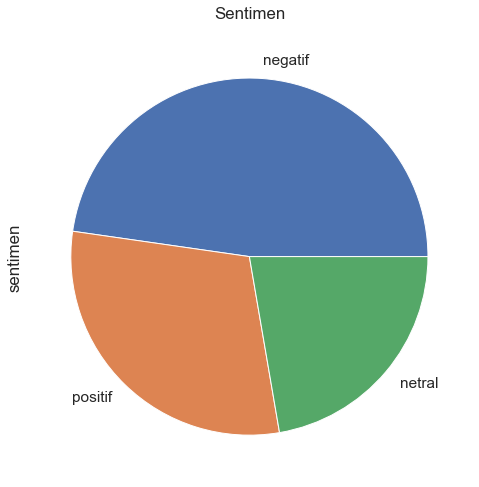

In [39]:
sns.set(font_scale=1.4)
senti_count.plot(kind='pie', figsize=(8, 10))#, rot=0)
plt.title("Sentimen", y=1.02);

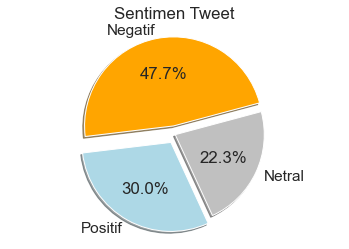

In [40]:
my_labels = 'Negatif','Positif','Netral'
my_colors = ['orange','lightblue','silver']
my_explode = (0.1, 0.1, 0)
plt.pie(senti_count, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Sentimen Tweet')
plt.axis('equal')
plt.show()

In [35]:
# Menggunakan one hot encoding untuk merubah kolom sentiment menjadi kategorikal
sentimen = pd.get_dummies(df1.sentimen,prefix='sentimen')
df1 = pd.concat([df1, sentimen], axis=1)
df1 = df1.drop(columns='nilai')
df1

cleaned_tweets  \
0                                                                                                                                    negara wkwkwland memang suka bikin acara tidak jelas buang anggaran orang kena korona di depok city pas sembuh dirayain dipikir korona langsung hilang kali   
1                                                                                                                                                                        pemerintah kota depok mencatat ada kasus baru covid pasien pulih dan sembilan warga meninggal akibat covid dalam sehari   
2                                                                                               wakil wali kota depok imam budi hartono berharap jawa barat culture and tourism festival jafest dapat membantu memulihkan ekonomi di masa pandemi covid terutama pada sektor industri pariwisata   
3                                                                                                                                                                                                                                                  corona hilang saya samperin kamu ke depok bil   
4                                                                                                                                                                                                                                   selama covid stok darah di pmi kota depok tidak pernah ideal   
...                                                                                                                                                                                                                                                                                          ...   
22174                                                   aku pas keluar rumah lupa bawa masker yawdalah yaa dekat begini belum ada yang positif juga wong depok pinggiran pas di rumah tidak enak badan panik googling segala macam ciri korona minum vit pokoknya tidak boleh sakit tidaaakkkkkk   
22175                                                                                                                                                                                                             kalau london bebas corona stay saja dulu di sana apa mau ke depok sini tertawa   
22176                                                                                                                                                                                                                                    kalau begini virus coronanya bisa kena virus s s bekasi   
22177  pemerintah mana bisa nanganin wabah corona plis sakit yang kita biasa hadapi saja kita kekurangan staff kesehatan dan sarana prasarana karena memang kebanyakan warga wabah uler di depok saja tidak ada program jelasnya warga komunitas hewan cuma bisa yah pasrah kalau ketemu tangkep   
22178                                                                                                                                                                          update ada orang terindikasi pelaku prostitusi diamankan satpol pulang pergi kota depok di sebuah apartemen lewat   

      sentimen  sentimen_negatif  sentimen_netral  sentimen_positif  
0       netral                 0                1                 0  
1      positif                 0                0                 1  
2      positif                 0                0                 1  
3      negatif                 1                0                 0  
4      negatif                 1                0                 0  
...        ...               ...              ...               ...  
22174  negatif                 1                0                 0  
22175  negatif                 1                0                 0  
22176  negatif                 1                0                 0  
22177  negatif                 1                0                 0  

In [36]:
# Agar dapat diproses oleh model, kita perlu mengubah nilai-nilai dari dataframe ke dalam tipe data numpy array menggunakan atribut values.
tweet_sentimen = df1['cleaned_tweets'].values
label = df1[['sentimen_negatif', 'sentimen_netral',
       'sentimen_positif']].values

# Data Splitting

In [52]:
# Membagi data menjadi 90% data train dan 10% data test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(tweet_sentimen, label, test_size=0.1)

In [53]:
# Memasukkan fungsi tokenizer yang didalamnya terdapat parameter untuk menyimpan 6500 kata yang sering muncul
tokenizer = Tokenizer(num_words=6500, oov_token='-')
tokenizer.fit_on_texts(x_train) 
tokenizer.fit_on_texts(x_test)

# Memasukkan data train dan test ke dalam sequence
sekuens_latih = tokenizer.texts_to_sequences(x_train)
sekuens_test = tokenizer.texts_to_sequences(x_test)

# Menggunakan padding agar sequence menjadi sama panjang
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [55]:
import pickle5 as pickle
with open('tokenizer2.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Modelling

In [56]:
# Membuat kelas dan fungsi agar proses training berhenti saat akurasi validasi model telah mencapai 92%
class myCallBack(tf.keras.callbacks.Callback):    
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') >= 0.85):
            print("\nAkurasi validasi telah mencapai > 85%!")
            self.model.stop_training = True
myCallBack = myCallBack()

In [57]:
# Fungsi untuk menyimpan model "C:\Users\Alfa\Program Skripsi\kesehatan_fix_blom_fix.csv"
save_direc = os.path.join(os.getcwd(), 'C:/Users/Alfa/Program Skripsi/')

model_name = 'geaNlp_weight_model.h5'

# Membuat directory untuk menyimpan model
if not os.path.isdir(save_direc):
    os.makedirs(save_direc)

# Menggabungkan directory dengan model
modelpath = os.path.join(save_direc, model_name)

checkpoint = ModelCheckpoint(filepath = modelpath, verbose = 1, save_best_only = True,
                             save_weights_only = True, save_freq=1)

In [58]:
# Membuat model Sequential dengan Bidirectional LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(6500, 32), # 6500 input & 32 layer embedding
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)), # 64 layer LSTM
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)), # 32 layer LSTM
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'), # Menambah layer dan menggunakan relu sebagai fungsi aktivasi
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'), #kernel_regularizer=regularizers.l2(0.0001),
    tf.keras.layers.Dropout(0.5), # Menggunakan dropout agar model tidak overfitting
    tf.keras.layers.Dense(3, activation='softmax') # Outputnya adalah 3 dan karena kategorikal menggunakan aktivasi softmax
])

model.summary() # Melihat shape dan parameter model
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.0001),metrics=['accuracy']) # Menggunakan optimizer RMSprop dengan learning rate 0.0001

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          208000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 128)         49664     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 512)               66048     
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)              

In [59]:
#batch_size = 16
history = model.fit(padded_latih, y_train, validation_data=(padded_test, y_test), epochs=350, #batch_size=batch_size,
                    steps_per_epoch= 30, callbacks=[myCallBack, checkpoint], verbose = 1)

Epoch 1/350
30/30 [==============================] - 8s 98ms/step - loss: 1.2880 - accuracy: 0.4572 - val_loss: 1.2421 - val_accuracy: 0.4720

Epoch 00001: val_loss improved from inf to 1.24214, saving model to C:/Users/Alfa/Program Skripsi\geaNlp_weight_model.h5
Epoch 2/350
30/30 [==============================] - 2s 57ms/step - loss: 1.2359 - accuracy: 0.4746 - val_loss: 1.2176 - val_accuracy: 0.4720

Epoch 00002: val_loss improved from 1.24214 to 1.21757, saving model to C:/Users/Alfa/Program Skripsi\geaNlp_weight_model.h5
Epoch 3/350
30/30 [==============================] - 2s 57ms/step - loss: 1.2115 - accuracy: 0.4784 - val_loss: 1.1883 - val_accuracy: 0.4720

Epoch 00003: val_loss improved from 1.21757 to 1.18833, saving model to C:/Users/Alfa/Program Skripsi\geaNlp_weight_model.h5
Epoch 4/350
30/30 [==============================] - 2s 56ms/step - loss: 1.1829 - accuracy: 0.4723 - val_loss: 1.1523 - val_accuracy: 0.4720

Epoch 00004: val_loss improved from 1.18833 to 1.15227, s

In [60]:
# Save model yang telah dijalankan
model.save("lstmModel.h5")

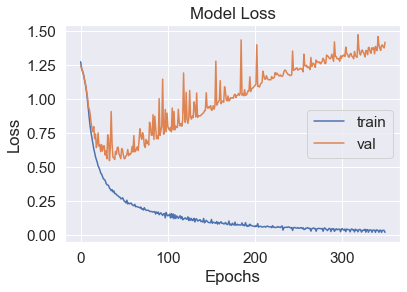

In [45]:
# Menampilkan plot loss dari model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

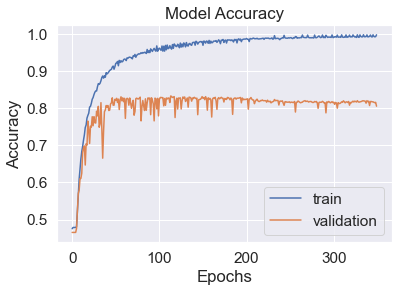

In [46]:
# Menampilkan plot akurasi dari model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Evaluasi Model

In [47]:
loss, acc = model.evaluate(padded_test, y_test, verbose=1)
                            #batch_size=batch_size)
print("loss:", loss)
print("Validation accuracy:", acc)

70/70 [==============================] - 0s 6ms/step - loss: 1.4173 - accuracy: 0.8057
loss: 1.417310357093811
Validation accuracy: 0.8056808114051819


In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

def model_evaluate(): 
    # predict class with test set
    y_pred_test =  model.predict_classes(padded_test, verbose=0)
    print('Accuracy:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred_test)*100))
    
    #classification report
    print('\n')
    print(classification_report(np.argmax(y_test,axis=1), y_pred_test))

    #confusion matrix
    confmat = confusion_matrix(np.argmax(y_test,axis=1), y_pred_test)

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()

C:\Users\Alfa\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:	80.6%


              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1032
           1       0.62      0.62      0.62       502
           2       0.80      0.89      0.84       684

    accuracy                           0.81      2218
   macro avg       0.78      0.78      0.78      2218
weighted avg       0.81      0.81      0.81      2218



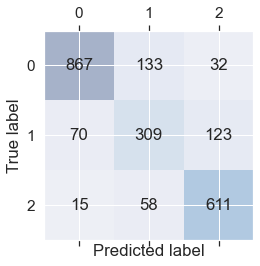

In [49]:
model_evaluate()

In [50]:
twt = ['covid menambah jumlah kematian dan ekonomi menurun']
print(twt)
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=29, dtype='int32', value=0)
#print(twt)
sentiment = model.predict(twt)[0]
if(np.argmax(sentiment) == 0):
    print('Sentimen: Negatif')
elif (np.argmax(sentiment) == 1):
    print('Sentimen: Netral')
else :
    print('Sentimen: Positif')
print(sentiment)

['covid menambah jumlah kematian dan ekonomi menurun']
Sentimen: Negatif
[9.9993253e-01 6.7142719e-05 4.1641303e-07]


In [51]:
twt = ['1000 orang telah sehat dan sembuh']
print(twt)
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=29, dtype='int32', value=0)
#print(twt)
sentiment = model.predict(twt)[0]
print(sentiment)
if(np.argmax(sentiment) == 0):
    print('Sentimen: Negatif')
elif (np.argmax(sentiment) == 1):
    print('Sentimen: Netral')
else :
    print('Sentimen: Positif')

['1000 orang telah sehat dan sembuh']
[2.3177545e-05 5.1059014e-06 9.9997175e-01]
Sentimen: Positif
